In [1]:
from trader_factory import build_active_trader_IB

In [2]:
from IBridgePy.IbridgepyTools import symbol

In [3]:
t = build_active_trader_IB('DU1868499')  # Build an active trader to get connected to Interactive Brokers

In [4]:
hist = t.request_historical_data(symbol('SPY'), '1 day', '1 Y')  # Get historical data. Return is a pandas.DataFrame

In [5]:
hist  # print hist to show it

open    high     low   close  volume
2019-12-17  319.92  320.25  319.48  319.57  290316
2019-12-18  320.01  320.25  319.53  319.59  276219
2019-12-19  319.79  320.98  319.75  320.90  344693
2019-12-20  320.46  321.45  320.37  320.73  521812
2019-12-23  321.59  321.65  321.06  321.22  257147
...            ...     ...     ...     ...     ...
2020-12-09  370.88  371.05  365.95  366.85  499276
2020-12-10  365.37  367.86  364.43  366.73  344586
2020-12-11  364.90  366.58  363.26  366.30  365387
2020-12-14  368.62  369.80  364.47  364.66  437356
2020-12-15  367.40  369.59  365.92  369.59  348842

[252 rows x 5 columns]

In [6]:
hist.columns  # print column names

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [7]:
hist.index  # print index

Index([2019-12-17, 2019-12-18, 2019-12-19, 2019-12-20, 2019-12-23, 2019-12-24,
       2019-12-26, 2019-12-27, 2019-12-30, 2019-12-31,
       ...
       2020-12-02, 2020-12-03, 2020-12-04, 2020-12-07, 2020-12-08, 2020-12-09,
       2020-12-10, 2020-12-11, 2020-12-14, 2020-12-15],
      dtype='object', length=252)

In [8]:
hist['open']  # print out a column

2019-12-17    319.92
2019-12-18    320.01
2019-12-19    319.79
2019-12-20    320.46
2019-12-23    321.59
               ...  
2020-12-09    370.88
2020-12-10    365.37
2020-12-11    364.90
2020-12-14    368.62
2020-12-15    367.40
Name: open, Length: 252, dtype: float64

In [9]:
hist.iloc[0]  # print out 1st row

open         319.92
high         320.25
low          319.48
close        319.57
volume    290316.00
Name: 2019-12-17, dtype: float64

In [10]:
hist.iloc[-1]  # print out the last row

open         367.40
high         369.59
low          365.92
close        369.59
volume    348842.00
Name: 2020-12-15, dtype: float64

In [11]:
hist.iloc[0]['open']  # print out open price of the 1st row

319.92

In [12]:
type(hist.index[-1])  # print out the data type of index

datetime.date

In [13]:
import datetime as dt
hist.loc[dt.date(2020,12,15)]  # print out the prices of Dec 15th 2020

open         367.40
high         369.59
low          365.92
close        369.59
volume    348842.00
Name: 2020-12-15, dtype: float64

In [14]:
hist['close_yesterday'] = hist['close'].shift(1)  # add a new column, call it "close_yesterday"

In [15]:
hist

open    high     low   close  volume  close_yesterday
2019-12-17  319.92  320.25  319.48  319.57  290316              NaN
2019-12-18  320.01  320.25  319.53  319.59  276219           319.57
2019-12-19  319.79  320.98  319.75  320.90  344693           319.59
2019-12-20  320.46  321.45  320.37  320.73  521812           320.90
2019-12-23  321.59  321.65  321.06  321.22  257147           320.73
...            ...     ...     ...     ...     ...              ...
2020-12-09  370.88  371.05  365.95  366.85  499276           370.17
2020-12-10  365.37  367.86  364.43  366.73  344586           366.85
2020-12-11  364.90  366.58  363.26  366.30  365387           366.73
2020-12-14  368.62  369.80  364.47  364.66  437356           366.30
2020-12-15  367.40  369.59  365.92  369.59  348842           364.66

[252 rows x 6 columns]

In [16]:
hist['yield_yesterday'] = (hist['close'] - hist['close_yesterday']) / hist['close_yesterday']

In [17]:
hist

open    high     low   close  volume  close_yesterday  \
2019-12-17  319.92  320.25  319.48  319.57  290316              NaN   
2019-12-18  320.01  320.25  319.53  319.59  276219           319.57   
2019-12-19  319.79  320.98  319.75  320.90  344693           319.59   
2019-12-20  320.46  321.45  320.37  320.73  521812           320.90   
2019-12-23  321.59  321.65  321.06  321.22  257147           320.73   
...            ...     ...     ...     ...     ...              ...   
2020-12-09  370.88  371.05  365.95  366.85  499276           370.17   
2020-12-10  365.37  367.86  364.43  366.73  344586           366.85   
2020-12-11  364.90  366.58  363.26  366.30  365387           366.73   
2020-12-14  368.62  369.80  364.47  364.66  437356           366.30   
2020-12-15  367.40  369.59  365.92  369.59  348842           364.66   

            yield_yesterday  
2019-12-17              NaN  
2019-12-18         0.000063  
2019-12-19         0.004099  
2019-12-20        -0.000530  
2019-12-23         0.001528  
...                     ...  
2020-12-09        -0.008969  
2020-12-10        -0.000327  
2020-12-11        -0.001173  
2020-12-14        -0.004477  
2020-12-15         0.013519  

[252 rows x 7 columns]

In [18]:
hist['yield_tomorrow'] = hist['yield_yesterday'].shift(-1)

In [19]:
hist

open    high     low   close  volume  close_yesterday  \
2019-12-17  319.92  320.25  319.48  319.57  290316              NaN   
2019-12-18  320.01  320.25  319.53  319.59  276219           319.57   
2019-12-19  319.79  320.98  319.75  320.90  344693           319.59   
2019-12-20  320.46  321.45  320.37  320.73  521812           320.90   
2019-12-23  321.59  321.65  321.06  321.22  257147           320.73   
...            ...     ...     ...     ...     ...              ...   
2020-12-09  370.88  371.05  365.95  366.85  499276           370.17   
2020-12-10  365.37  367.86  364.43  366.73  344586           366.85   
2020-12-11  364.90  366.58  363.26  366.30  365387           366.73   
2020-12-14  368.62  369.80  364.47  364.66  437356           366.30   
2020-12-15  367.40  369.59  365.92  369.59  348842           364.66   

            yield_yesterday  yield_tomorrow  
2019-12-17              NaN        0.000063  
2019-12-18         0.000063        0.004099  
2019-12-19         0.004099       -0.000530  
2019-12-20        -0.000530        0.001528  
2019-12-23         0.001528        0.000031  
...                     ...             ...  
2020-12-09        -0.008969       -0.000327  
2020-12-10        -0.000327       -0.001173  
2020-12-11        -0.001173       -0.004477  
2020-12-14        -0.004477        0.013519  
2020-12-15         0.013519             NaN  

[252 rows x 8 columns]

In [20]:
hist.dropna(inplace=True)

In [21]:
hist

open    high     low   close  volume  close_yesterday  \
2019-12-18  320.01  320.25  319.53  319.59  276219           319.57   
2019-12-19  319.79  320.98  319.75  320.90  344693           319.59   
2019-12-20  320.46  321.45  320.37  320.73  521812           320.90   
2019-12-23  321.59  321.65  321.06  321.22  257147           320.73   
2019-12-24  321.47  321.52  320.90  321.23  122217           321.22   
...            ...     ...     ...     ...     ...              ...   
2020-12-08  367.69  370.78  367.67  370.17  269841           369.09   
2020-12-09  370.88  371.05  365.95  366.85  499276           370.17   
2020-12-10  365.37  367.86  364.43  366.73  344586           366.85   
2020-12-11  364.90  366.58  363.26  366.30  365387           366.73   
2020-12-14  368.62  369.80  364.47  364.66  437356           366.30   

            yield_yesterday  yield_tomorrow  
2019-12-18         0.000063        0.004099  
2019-12-19         0.004099       -0.000530  
2019-12-20        -0.000530        0.001528  
2019-12-23         0.001528        0.000031  
2019-12-24         0.000031        0.005323  
...                     ...             ...  
2020-12-08         0.002926       -0.008969  
2020-12-09        -0.008969       -0.000327  
2020-12-10        -0.000327       -0.001173  
2020-12-11        -0.001173       -0.004477  
2020-12-14        -0.004477        0.013519  

[250 rows x 8 columns]

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [23]:
hist.shape

(250, 8)

In [24]:
x = hist['yield_yesterday']
y = hist['yield_tomorrow']
model = LinearRegression()
model.fit(hist.loc[:, ['yield_yesterday']], y)
print(model.coef_)
print(model.intercept_)


[-0.31591508]
0.0010464284461400627


In [25]:
preds = model.predict(hist.loc[:, ["yield_yesterday"]])

In [26]:
preds

array([ 1.02665719e-03, -2.48508043e-04,  1.21378763e-03,  5.63784514e-04,
        1.03659360e-03, -6.35278692e-04,  1.12468820e-03,  2.78813953e-03,
        2.78975596e-04, -1.90797529e-03,  3.43861945e-03, -1.58793310e-04,
        1.93470777e-03, -6.37251208e-04, -1.09569876e-03,  1.95553659e-03,
       -1.12620910e-03,  1.52807973e-03,  3.32496066e-04, -1.58146443e-03,
        6.31317862e-05,  1.66503005e-03,  1.00828597e-03,  6.84118644e-04,
        3.85587461e-03,  6.11037121e-03, -2.26408814e-03,  1.30736353e-03,
        2.11697876e-05,  6.78280148e-03, -1.30037489e-03, -3.76851814e-03,
       -2.60177339e-03, -1.65556545e-05,  2.73014855e-03, -1.31199839e-03,
        4.98948031e-04, -9.88936850e-04,  1.38348442e-03,  5.40304485e-04,
        1.86054609e-03, -4.64049611e-04,  2.34430029e-03,  4.29980527e-03,
        1.15238807e-02,  1.06193157e-02,  2.20843817e-03,  1.52347172e-02,
        2.37375811e-03, -1.26347653e-02,  1.00918471e-02, -1.22324428e-02,
        1.15479845e-02,  

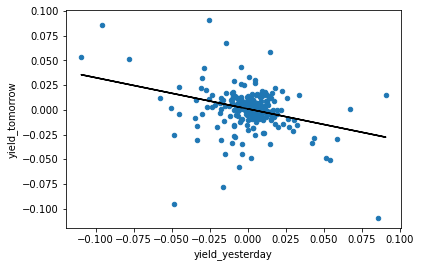

In [27]:
hist.plot.scatter(x = "yield_yesterday", y = "yield_tomorrow")
plt.plot(hist['yield_yesterday'], preds, color="black")

In [28]:
import os
os.getcwd()

'/Users/huiliu/Documents/YellowstoneIBridgePy'

In [29]:
hist.to_csv(os.path.join(os.getcwd(), 'Output', 'myHist.csv'))

In [30]:
import pandas as pd
newHist = pd.read_csv(os.path.join(os.getcwd(), 'Output', 'myHist.csv'), header=0)

In [31]:
newHist

Unnamed: 0    open    high     low   close  volume  close_yesterday  \
0    2019-12-18  320.01  320.25  319.53  319.59  276219           319.57   
1    2019-12-19  319.79  320.98  319.75  320.90  344693           319.59   
2    2019-12-20  320.46  321.45  320.37  320.73  521812           320.90   
3    2019-12-23  321.59  321.65  321.06  321.22  257147           320.73   
4    2019-12-24  321.47  321.52  320.90  321.23  122217           321.22   
..          ...     ...     ...     ...     ...     ...              ...   
245  2020-12-08  367.69  370.78  367.67  370.17  269841           369.09   
246  2020-12-09  370.88  371.05  365.95  366.85  499276           370.17   
247  2020-12-10  365.37  367.86  364.43  366.73  344586           366.85   
248  2020-12-11  364.90  366.58  363.26  366.30  365387           366.73   
249  2020-12-14  368.62  369.80  364.47  364.66  437356           366.30   

     yield_yesterday  yield_tomorrow  
0           0.000063        0.004099  
1           0.004099       -0.000530  
2          -0.000530        0.001528  
3           0.001528        0.000031  
4           0.000031        0.005323  
..               ...             ...  
245         0.002926       -0.008969  
246        -0.008969       -0.000327  
247        -0.000327       -0.001173  
248        -0.001173       -0.004477  
249        -0.004477        0.013519  

[250 rows x 9 columns]

In [32]:
newHist.set_index('Unnamed: 0')

open    high     low   close  volume  close_yesterday  \
Unnamed: 0                                                            
2019-12-18  320.01  320.25  319.53  319.59  276219           319.57   
2019-12-19  319.79  320.98  319.75  320.90  344693           319.59   
2019-12-20  320.46  321.45  320.37  320.73  521812           320.90   
2019-12-23  321.59  321.65  321.06  321.22  257147           320.73   
2019-12-24  321.47  321.52  320.90  321.23  122217           321.22   
...            ...     ...     ...     ...     ...              ...   
2020-12-08  367.69  370.78  367.67  370.17  269841           369.09   
2020-12-09  370.88  371.05  365.95  366.85  499276           370.17   
2020-12-10  365.37  367.86  364.43  366.73  344586           366.85   
2020-12-11  364.90  366.58  363.26  366.30  365387           366.73   
2020-12-14  368.62  369.80  364.47  364.66  437356           366.30   

            yield_yesterday  yield_tomorrow  
Unnamed: 0                                   
2019-12-18         0.000063        0.004099  
2019-12-19         0.004099       -0.000530  
2019-12-20        -0.000530        0.001528  
2019-12-23         0.001528        0.000031  
2019-12-24         0.000031        0.005323  
...                     ...             ...  
2020-12-08         0.002926       -0.008969  
2020-12-09        -0.008969       -0.000327  
2020-12-10        -0.000327       -0.001173  
2020-12-11        -0.001173       -0.004477  
2020-12-14        -0.004477        0.013519  

[250 rows x 8 columns]